Hi, This is my very first EDA. If you like it please do comment and vote. **Thank you**.

**Attribute Information:** 
> 1. age 
> 2. sex 
> 3. chest pain type (4 values) 
> 4. resting blood pressure 
> 5. serum cholestoral in mg/dl 
> 6. fasting blood sugar > 120 mg/dl
> 7. resting electrocardiographic results (values 0,1,2)
> 8. maximum heart rate achieved 
> 9. exercise induced angina 
> 10. oldpeak = ST depression induced by exercise relative to rest 
> 11. the slope of the peak exercise ST segment 
> 12. number of major vessels (0-3) colored by flourosopy 
> 13. thal
> 14. target

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['heart.csv']


In [2]:
#Loading the data and Checking first 5 rows.
data=pd.read_csv('../input/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
#Getting info about our Variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [4]:
#Cheching any Null values.
data.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [5]:
#Descriptive statistics of data
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
#Checking our Columns
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
#Getting the shape of the data set
data.shape

(303, 14)

Text(0.5, 1.0, 'Correlation Table')

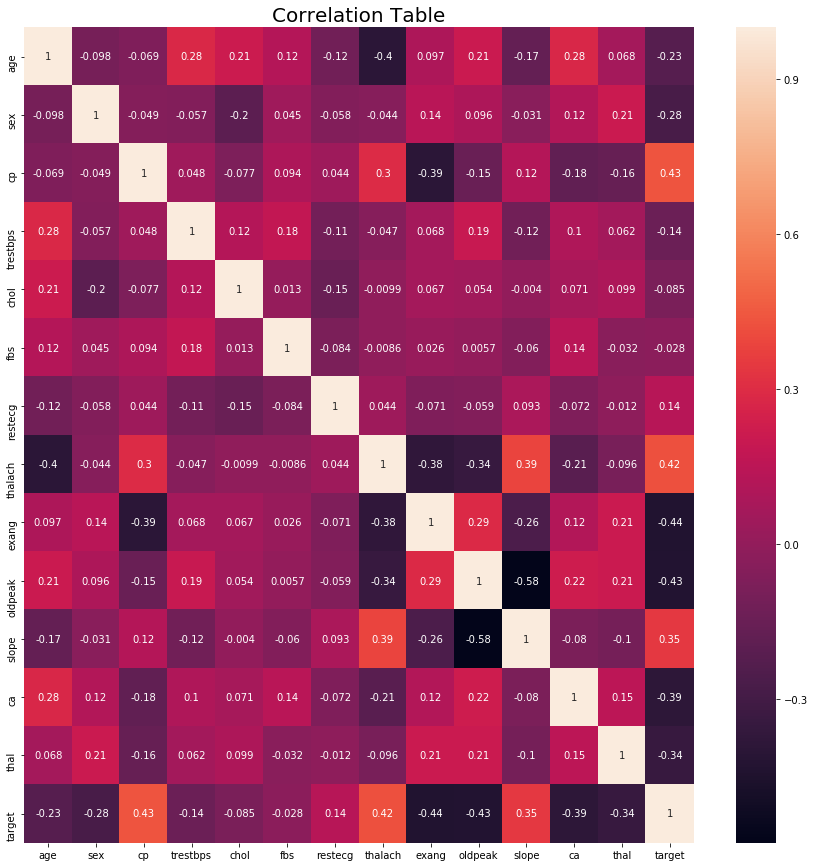

In [8]:
#How well the variables are related to each other.
plt.figure(figsize = (15, 15))
sns.heatmap(data.corr(), annot = True)
plt.title('Correlation Table', fontsize = 20)

Age Analysis

In [9]:
data.age.head()

0    63
1    37
2    41
3    56
4    57
Name: age, dtype: int64

In [10]:
print('The Oldest Person in the room is of age', data.age.max())
print('The Youngest Person in the room is of age', data.age.min())
print('The Mean age in the room is', data.age.mean())

The Oldest Person in the room is of age 77
The Youngest Person in the room is of age 29
The Mean age in the room is 54.366336633663366


In [11]:
#lets find the frequency of age
data.age.value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64

Text(0.5, 1.0, 'Frequency')

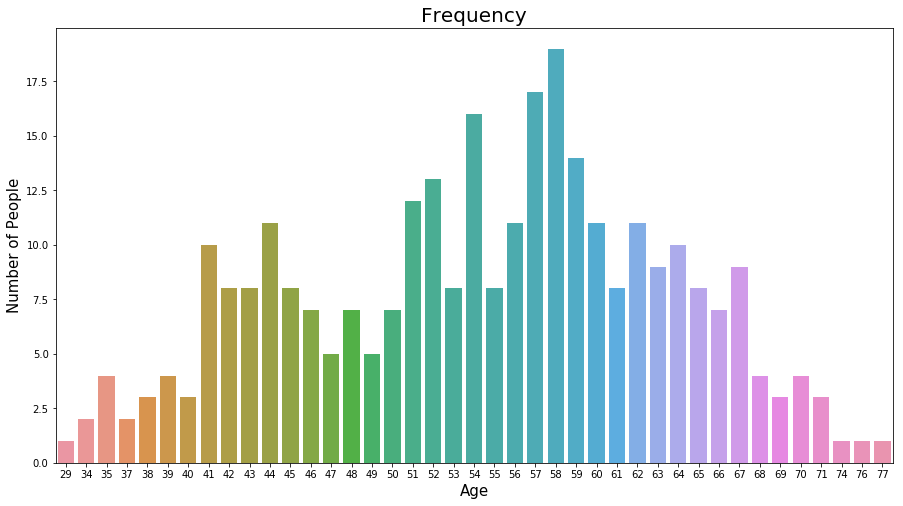

In [12]:
#Plotting the Frequency of Age.
plt.figure(figsize = (15,8))
sns.countplot(data['age'])
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Number of People', fontsize = 15)
plt.title('Frequency', fontsize = 20)

Majority of People are of age 58 and 57.
So people of late 50's be careful :p

Text(0.5, 1.0, 'Histogram')

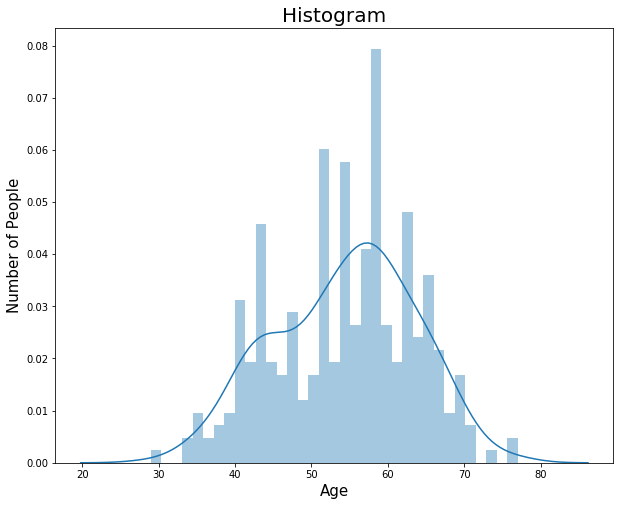

In [13]:
#Plotting the Distribution of Age. 
#Histogram
plt.figure(figsize = (10,8))
sns.distplot(data['age'], bins = 35, kde = True)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Number of People', fontsize = 15)
plt.title('Histogram', fontsize = 20)

Gender Analysis

Text(0, 0.5, 'Number of People')

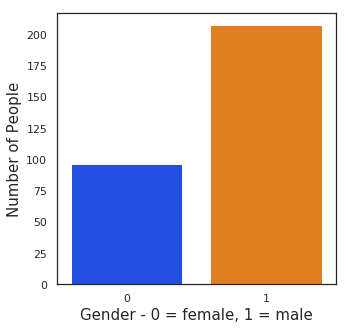

In [14]:
#0 = female, 1 = male
plt.figure(figsize = (5,5))
sns.set(style = 'white', palette = 'bright', color_codes = True)
sns.countplot(data['sex'])
plt.xlabel('Gender - 0 = female, 1 = male', fontsize = 15)
plt.ylabel('Number of People', fontsize = 15)

Text(0.5, 1.0, 'Frequency')

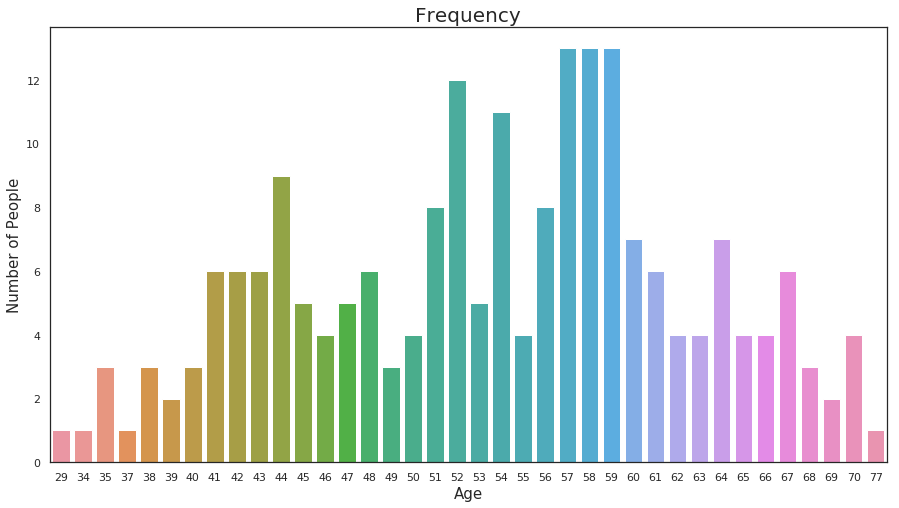

In [15]:
#Plotting the Frequency of Male Age.
plt.figure(figsize = (15, 8))
sns.countplot(data[data['sex']==1]['age'])
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Number of People', fontsize = 15)
plt.title('Frequency', fontsize = 20)

Text(0.5, 1.0, 'Frequency')

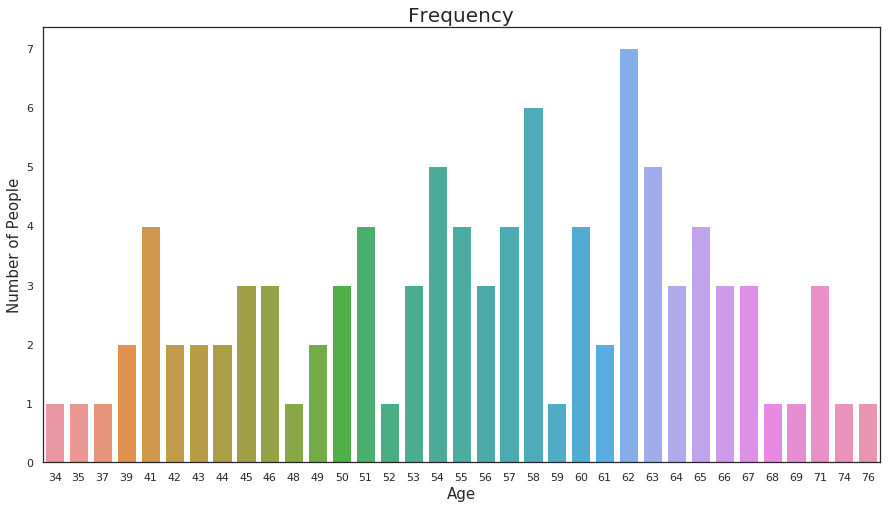

In [16]:
#Plotting the Frequency of Female Age.
plt.figure(figsize = (15, 8))
sns.countplot(data[data['sex']==0]['age'])
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Number of People', fontsize = 15)
plt.title('Frequency', fontsize = 20)

Text(0.5, 1.0, 'Frequency')

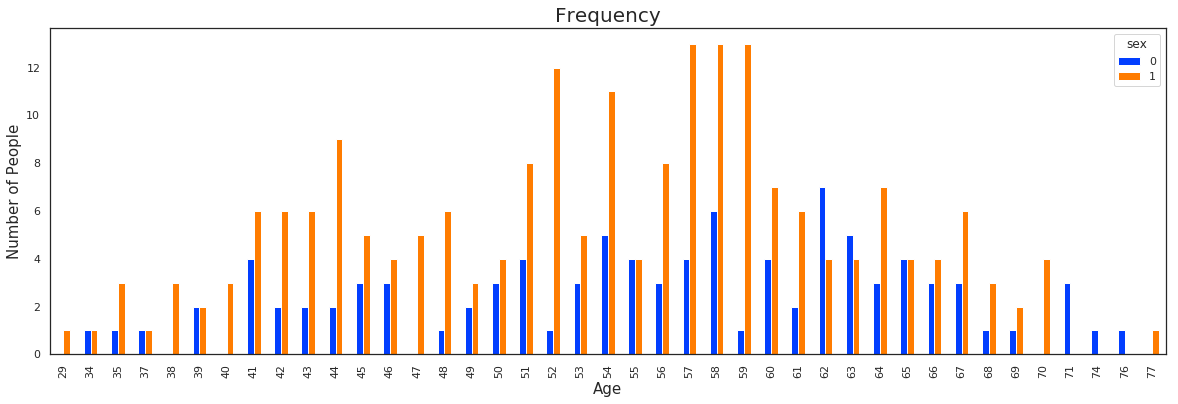

In [17]:
#lets crosstabs for age and gender.
pd.crosstab(data.age,data.sex).plot(kind='bar',figsize=(20,6))
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Number of People', fontsize = 15)
plt.title('Frequency', fontsize = 20)

cp Analysis

Text(0.5, 1.0, 'Frequency')

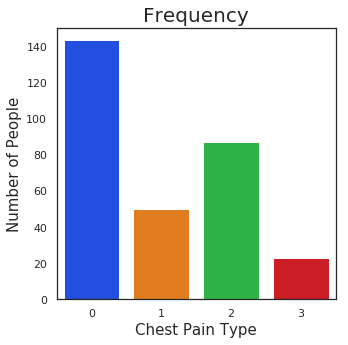

In [18]:
#Value 1: typical angina 
#Value 2: atypical angina
#Value 3: non-anginal pain 
#Value 4: asymptomatic
plt.figure(figsize = (5,5))
sns.countplot(data['cp'])
plt.xlabel('Chest Pain Type', fontsize = 15)
plt.ylabel('Number of People', fontsize = 15)
plt.title('Frequency', fontsize = 20)

We see majority of people are suffering from Typical Angina

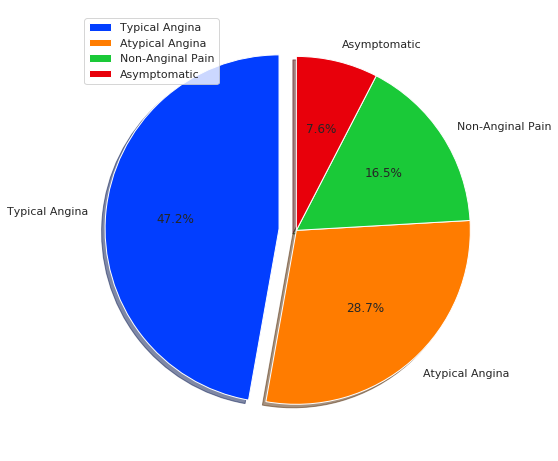

In [19]:
#Percentage of People Suffering from different Chest Pain Types
plt.figure(figsize = (8,8))
lables = ['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic']
sizes = data['cp'].value_counts().values
explode = [0.1, 0, 0, 0]
plt.pie(sizes, labels = lables, explode = explode, shadow = True, startangle=90, autopct='%1.1f%%')
plt.legend()
plt.show()

Text(0.5, 1.0, 'People falling Under Different Chest Pain Types')

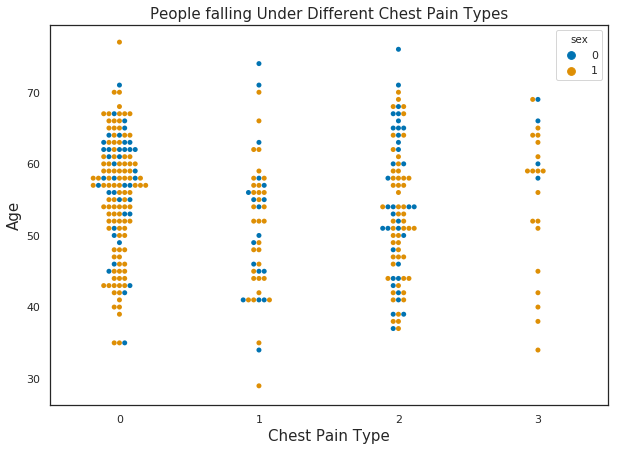

In [20]:
#People falling Under Different Chest Pain Types accourding to ages
plt.figure(figsize = (10,7))
sns.set(style = 'white', palette = 'colorblind', color_codes = True)
sns.swarmplot(x = 'cp', y = 'age', hue = 'sex', data = data)
plt.xlabel('Chest Pain Type', fontsize = 15)
plt.ylabel('Age', fontsize = 15)
plt.title('People falling Under Different Chest Pain Types', fontsize = 15)

From Pie Chart we know that majority of people suffer from CP0.
Here we can see that 55-60 age group people are most prone to CP0. 

Text(0.5, 1.0, 'Different Chest Pain Types Vs Resting BPs')

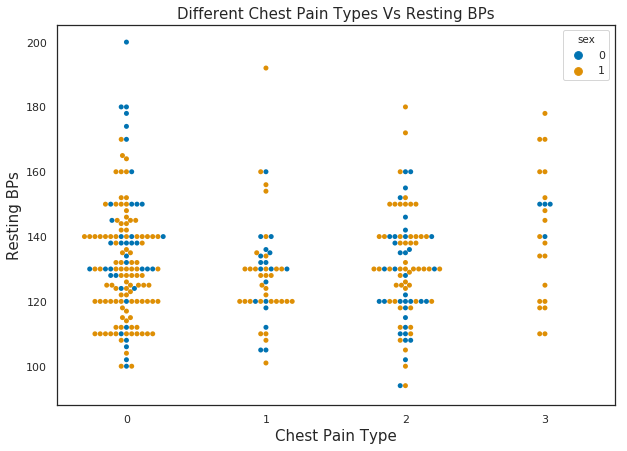

In [21]:
#Different Chest Pain Types Vs Resting BPs
plt.figure(figsize = (10,7))
sns.set(style = 'white', palette = 'colorblind', color_codes = True)
sns.swarmplot(x = 'cp', y = 'trestbps', hue = 'sex', data = data)
plt.xlabel('Chest Pain Type', fontsize = 15)
plt.ylabel('Resting BPs', fontsize = 15)
plt.title('Different Chest Pain Types Vs Resting BPs', fontsize = 15)

trestbps Analysis - resting blood pressure (in mm Hg on admission to the hospital)

Text(0.5, 1.0, 'Resting Blood Pressure Freqeuncy')

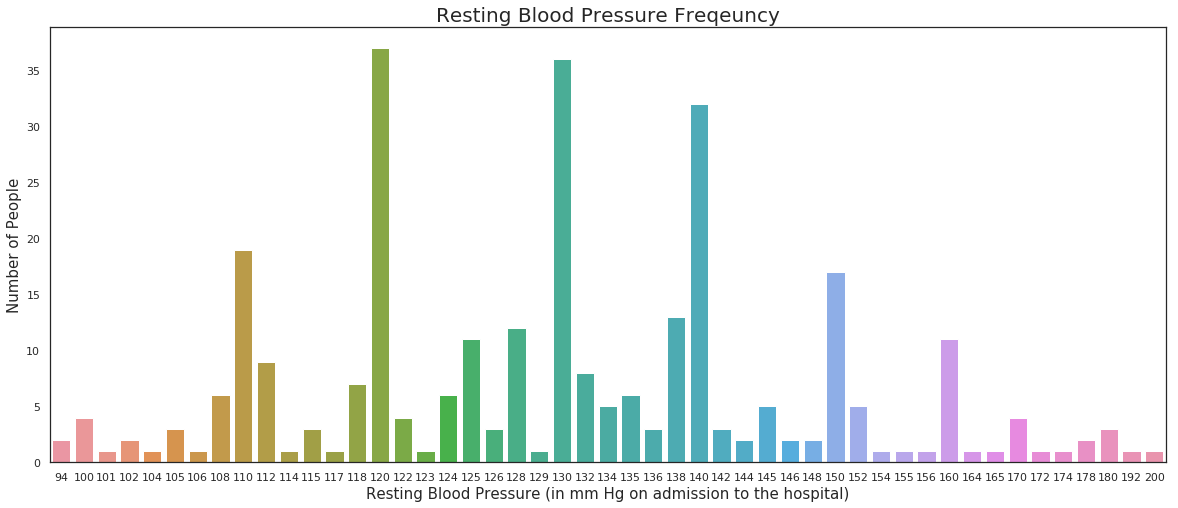

In [22]:
#Resting Blood Pressure Freqeuncy
plt.figure(figsize = (20,8))
sns.countplot(data['trestbps'])
plt.xlabel('Resting Blood Pressure (in mm Hg on admission to the hospital)', fontsize = 15)
plt.ylabel('Number of People', fontsize = 15)
plt.title('Resting Blood Pressure Freqeuncy', fontsize = 20)

Text(0.5, 1.0, 'Regression plot b/w Age and Resting BPs')

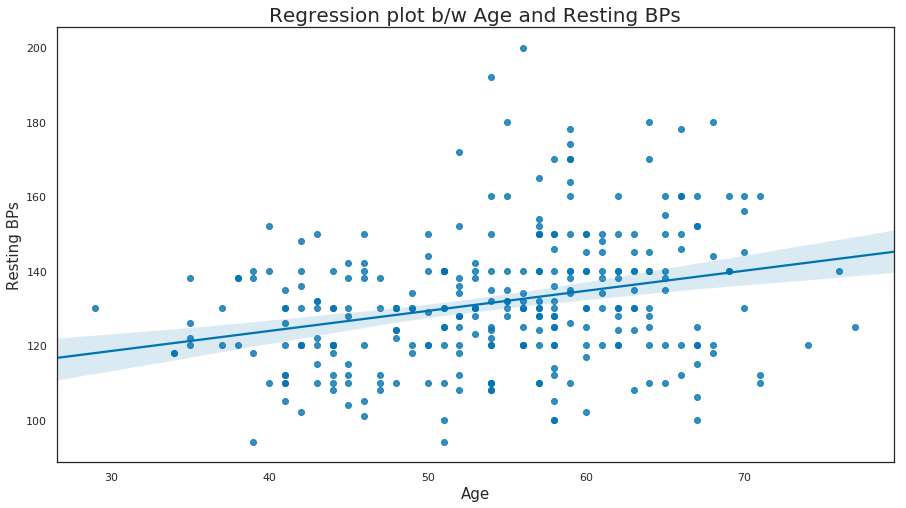

In [23]:
plt.figure(figsize = (15,8))
sns.regplot(x = 'age', y = 'trestbps', data = data, fit_reg = True)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Resting BPs', fontsize = 15)
plt.title('Regression plot b/w Age and Resting BPs', fontsize = 20)

We can see that there is a Positive relaion between Age and BP

In [24]:
print('Maximum Blood Pressure Observed with Chest Pain Type 0 Patients is:',data[data['cp']==0]['trestbps'].max())
print('Maximum Blood Pressure Observed with Chest Pain Type 1 Patients is:',data[data['cp']==1]['trestbps'].max())
print('Maximum Blood Pressure Observed with Chest Pain Type 2 Patients is:',data[data['cp']==2]['trestbps'].max())
print('Maximum Blood Pressure Observed with Chest Pain Type 3 Patients is:',data[data['cp']==3]['trestbps'].max())
print('Average Blood Pressure is', data['trestbps'].mean())
print('Minimum Blood Pressure Observed with Chest Pain Type 0 Patients is:',data[data['cp']==0]['trestbps'].min())
print('Minimum Blood Pressure Observed with Chest Pain Type 1 Patients is:',data[data['cp']==1]['trestbps'].min())
print('Minimum Blood Pressure Observed with Chest Pain Type 2 Patients is:',data[data['cp']==2]['trestbps'].min())
print('Minimum Blood Pressure Observed with Chest Pain Type 3 Patients is:',data[data['cp']==3]['trestbps'].min())

Maximum Blood Pressure Observed with Chest Pain Type 0 Patients is: 200
Maximum Blood Pressure Observed with Chest Pain Type 1 Patients is: 192
Maximum Blood Pressure Observed with Chest Pain Type 2 Patients is: 180
Maximum Blood Pressure Observed with Chest Pain Type 3 Patients is: 178
Average Blood Pressure is 131.62376237623764
Minimum Blood Pressure Observed with Chest Pain Type 0 Patients is: 100
Minimum Blood Pressure Observed with Chest Pain Type 1 Patients is: 101
Minimum Blood Pressure Observed with Chest Pain Type 2 Patients is: 94
Minimum Blood Pressure Observed with Chest Pain Type 3 Patients is: 110


chol Analysis (serum cholestoral in mg/dl)

Text(0.5, 1.0, 'Histogram for Chol')

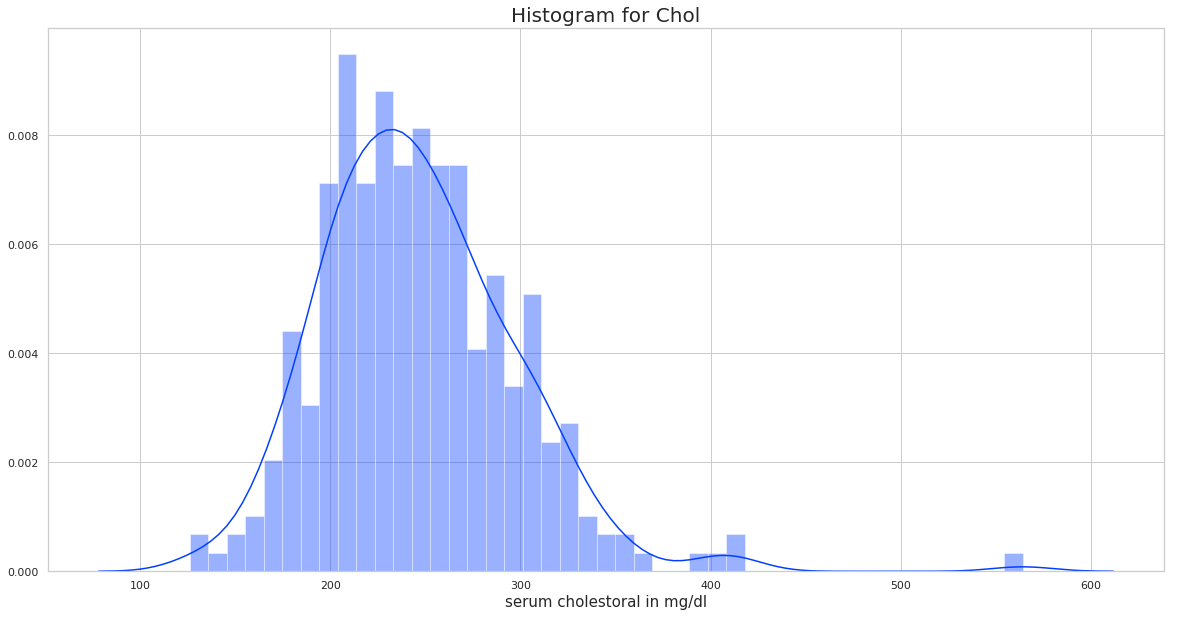

In [25]:
plt.figure(figsize = (20,10))
sns.set(style = 'whitegrid', palette = 'bright', color_codes = True)
sns.distplot(data['chol'], bins = 45, kde = True)
plt.xlabel('serum cholestoral in mg/dl', fontsize = 15)
plt.title('Histogram for Chol', fontsize = 20)

In [26]:
print('Maximum Serum Cholestrol(mg/dl) Observed with Chest Pain Type 0 Patients is:',
      data[data['cp']==0]['chol'].max())
print('Maximum Serum Cholestrol(mg/dl) Observed with Chest Pain Type 1 Patients is:',
      data[data['cp']==1]['chol'].max())
print('Maximum Serum Cholestrol(mg/dl) Observed with Chest Pain Type 2 Patients is:',
      data[data['cp']==2]['chol'].max())
print('Maximum Serum Cholestrol(mg/dl) Observed with Chest Pain Type 3 Patients is:',
      data[data['cp']==3]['chol'].max())
print('Average Serum Cholestrol(mg/dl) is', data['chol'].mean())
print('Minimum Serum Cholestrol(mg/dl) Observed with Chest Pain Type 0 Patients is:',
      data[data['cp']==0]['chol'].min())
print('Minimum Serum Cholestrol(mg/dl) Observed with Chest Pain Type 1 Patients is:',
      data[data['cp']==1]['chol'].min())
print('Minimum Serum Cholestrol(mg/dl) Observed with Chest Pain Type 2 Patients is:',
      data[data['cp']==2]['chol'].min())
print('Minimum Serum Cholestrol(mg/dl) Observed with Chest Pain Type 3 Patients is:',
      data[data['cp']==3]['chol'].min())

Maximum Serum Cholestrol(mg/dl) Observed with Chest Pain Type 0 Patients is: 409
Maximum Serum Cholestrol(mg/dl) Observed with Chest Pain Type 1 Patients is: 342
Maximum Serum Cholestrol(mg/dl) Observed with Chest Pain Type 2 Patients is: 564
Maximum Serum Cholestrol(mg/dl) Observed with Chest Pain Type 3 Patients is: 298
Average Serum Cholestrol(mg/dl) is 246.26402640264027
Minimum Serum Cholestrol(mg/dl) Observed with Chest Pain Type 0 Patients is: 131
Minimum Serum Cholestrol(mg/dl) Observed with Chest Pain Type 1 Patients is: 157
Minimum Serum Cholestrol(mg/dl) Observed with Chest Pain Type 2 Patients is: 126
Minimum Serum Cholestrol(mg/dl) Observed with Chest Pain Type 3 Patients is: 182


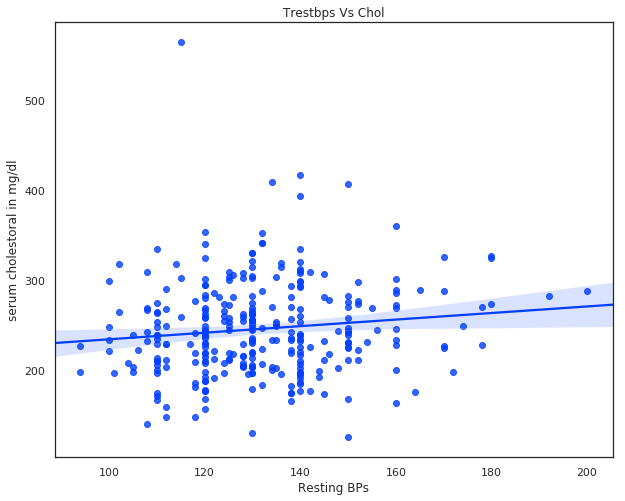

In [27]:
plt.figure(figsize = (10,8))
sns.set(style = 'white', palette = 'bright', color_codes = True)
ax = sns.regplot(x = 'trestbps', y = 'chol', data = data, fit_reg = True)
ax.set_xlabel(xlabel = 'Resting BPs')
ax.set_ylabel(ylabel = 'serum cholestoral in mg/dl')
ax.set_title(label = 'Trestbps Vs Chol')
plt.show()

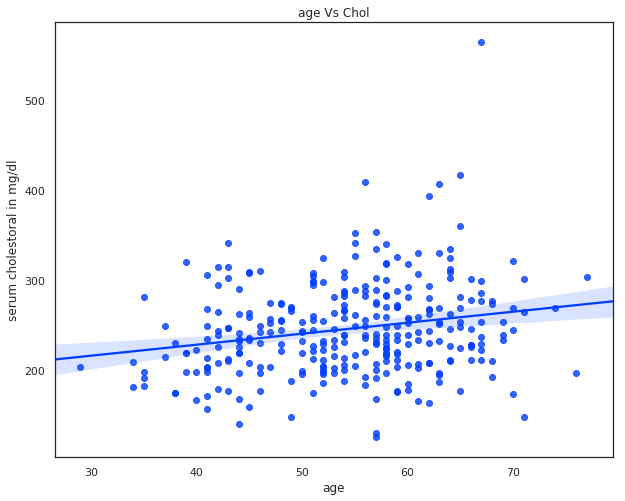

In [28]:
plt.figure(figsize = (10,8))
sns.set(style = 'white', palette = 'bright', color_codes = True)
ax = sns.regplot(x = 'age', y = 'chol', data = data, fit_reg = True)
ax.set_xlabel(xlabel = 'age')
ax.set_ylabel(ylabel = 'serum cholestoral in mg/dl')
ax.set_title(label = 'age Vs Chol')
plt.show()

Fasting Blood Sugar Analysis

Text(0.5, 1.0, 'Count of FBs')

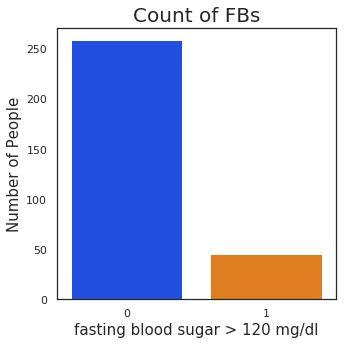

In [29]:
plt.figure(figsize = (5,5))
sns.countplot(data['fbs'])
plt.xlabel('fasting blood sugar > 120 mg/dl', fontsize = 15)
plt.ylabel('Number of People', fontsize = 15)
plt.title('Count of FBs', fontsize = 20)

Text(0.5, 1.0, 'Count of FBs')

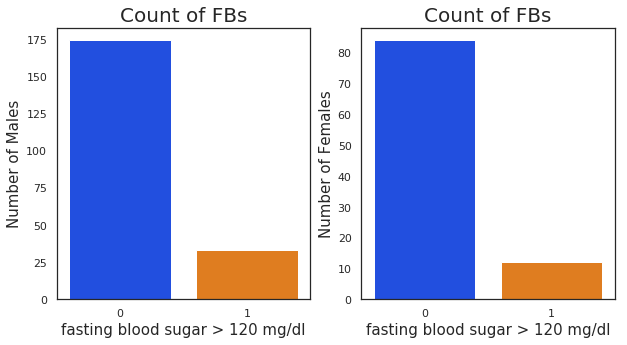

In [30]:
plt.figure(figsize=(10, 5))

#Number of Males with fasting blood sugar > 120 mg/dl
#1 = true; 0 = false
plt.subplot(1,2,1)
sns.countplot(data[data['sex']==1]['fbs'])
plt.xlabel('fasting blood sugar > 120 mg/dl', fontsize = 15)
plt.ylabel('Number of Males', fontsize = 15)
plt.title('Count of FBs', fontsize = 20)

#Number of Females with fasting blood sugar > 120 mg/dl
#1 = true; 0 = false
plt.subplot(1,2,2)
sns.countplot(data[data['sex']==0]['fbs'])
plt.xlabel('fasting blood sugar > 120 mg/dl', fontsize = 15)
plt.ylabel('Number of Females', fontsize = 15)
plt.title('Count of FBs', fontsize = 20)

Resting Electrocardiographic Analysis

Text(0.5, 1.0, 'Count of restecg')

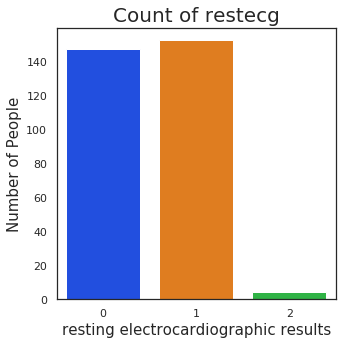

In [31]:
plt.figure(figsize = (5,5))
sns.countplot(data['restecg'])
plt.xlabel('resting electrocardiographic results', fontsize = 15)
plt.ylabel('Number of People', fontsize = 15)
plt.title('Count of restecg', fontsize = 20)

Text(0, 0.5, 'Number of Females')

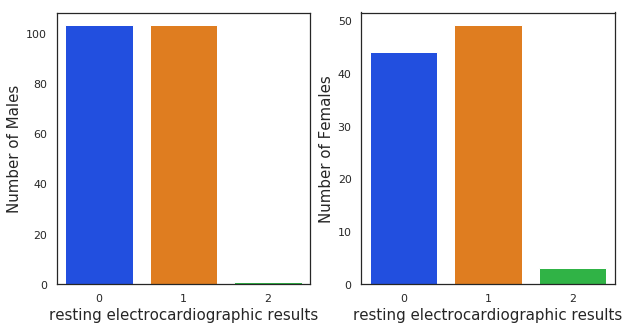

In [32]:
plt.figure(figsize=(10, 5))

#Male resting electrocardiographic results
plt.subplot(1,2,1)
sns.countplot(data[data['sex']==1]['restecg'])
plt.xlabel('resting electrocardiographic results', fontsize = 15)
plt.ylabel('Number of Males', fontsize = 15)

#Female resting electrocardiographic results
plt.subplot(1,2,2)
sns.countplot(data[data['sex']==0]['restecg'])
plt.xlabel('resting electrocardiographic results', fontsize = 15)
plt.ylabel('Number of Females', fontsize = 15)

<Figure size 720x720 with 0 Axes>

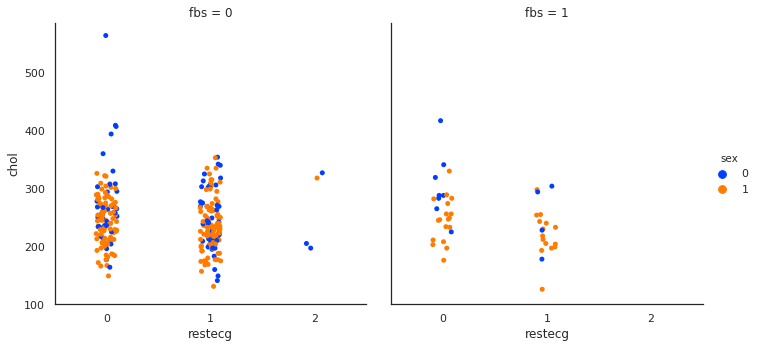

In [33]:
plt.figure(figsize = (10,10))
sns.set(style = 'white', palette = 'bright', color_codes = True)
sns.catplot(x = 'restecg', y = 'chol', hue = 'sex', col = 'fbs', data = data)

Analysis on Maximum Heart Rate Achieved

Text(0.5, 1.0, 'Distribution of maximum heart rate')

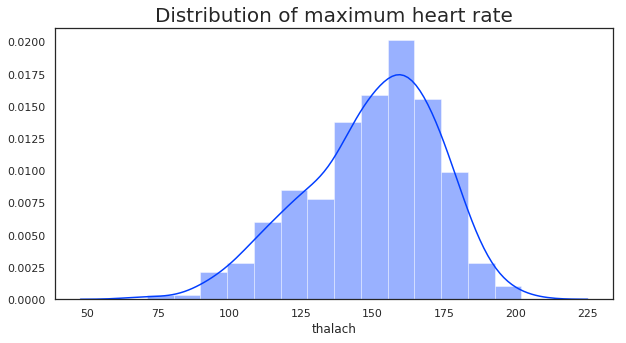

In [34]:
#Distribution of maximum heart rate achieved.
plt.figure(figsize = (10,5))
sns.distplot(data['thalach'], kde = True)
plt.title('Distribution of maximum heart rate', fontsize = 20)

Text(0, 0.5, 'Average of the Max Heart Rate Achieved')

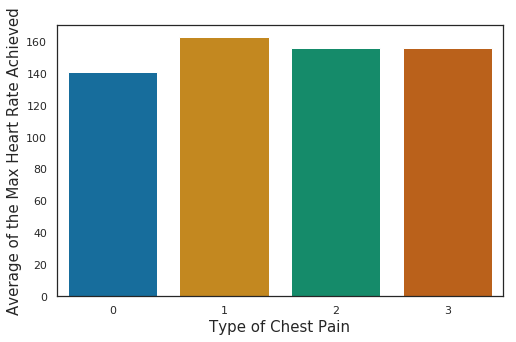

In [35]:
#we will see the Average of the Maximum Heart Achieved Accourding to the Chest Pain Type
plt.figure(figsize = (8,5))
sns.set(style = 'white', palette = 'colorblind', color_codes = True)
sns.barplot(x = data.groupby(data['cp'])['thalach'].mean().index, 
            y = data.groupby(data['cp'])['thalach'].mean().values)
plt.xlabel('Type of Chest Pain', fontsize = 15)
plt.ylabel('Average of the Max Heart Rate Achieved', fontsize = 15)

Text(0.5, 1.0, 'Thalach Vs Trestbps')

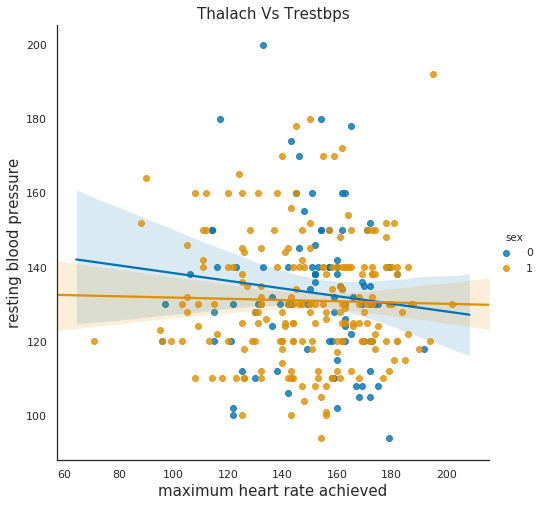

In [36]:
sns.set(style = 'white', palette = 'colorblind', color_codes = True)
sns.lmplot(x = 'thalach', y = 'trestbps', hue = 'sex', fit_reg = True, height = 7, aspect = 1, data = data)
plt.xlabel('maximum heart rate achieved', fontsize = 15)
plt.ylabel('resting blood pressure', fontsize = 15)
plt.title('Thalach Vs Trestbps', fontsize = 15)

Text(0.5, 1.0, 'Thalach Vs Chol')

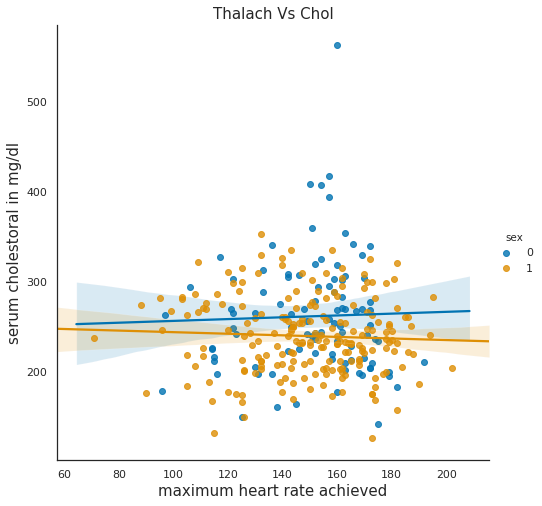

In [37]:
sns.set(style = 'white', palette = 'colorblind', color_codes = True)
sns.lmplot(x = 'thalach', y = 'chol', hue = 'sex', fit_reg = True, height = 7, aspect = 1, data = data)
plt.xlabel('maximum heart rate achieved', fontsize = 15)
plt.ylabel('serum cholestoral in mg/dl', fontsize = 15)
plt.title('Thalach Vs Chol', fontsize = 15)

Text(0.5, 1.0, 'Restecg Vs Thalach')

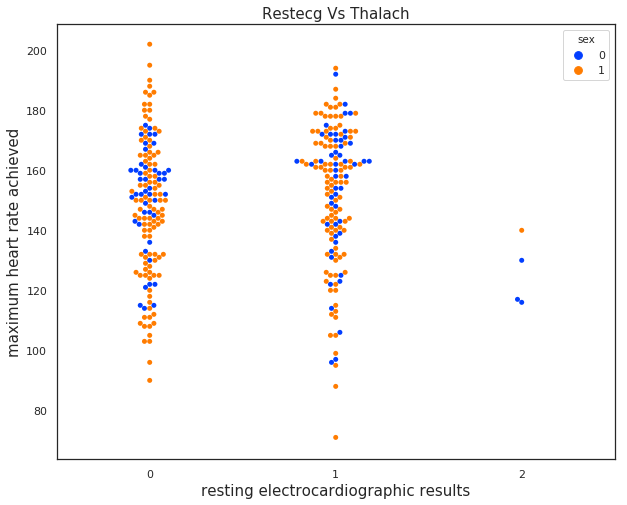

In [38]:
plt.figure(figsize = (10,8))
sns.set(style = 'white', palette = 'bright', color_codes = True)
sns.swarmplot(x = 'restecg', y = 'thalach', hue = 'sex', data = data)
plt.xlabel('resting electrocardiographic results', fontsize = 15)
plt.ylabel('maximum heart rate achieved', fontsize = 15)
plt.title('Restecg Vs Thalach', fontsize = 15)

Analysis on Exercise Induced Angina

Text(0, 0.5, 'Number of People')

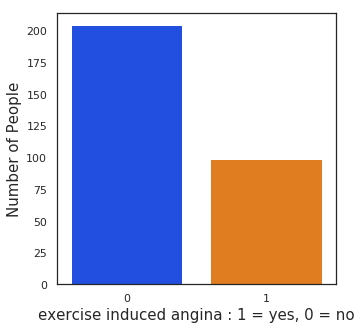

In [39]:
plt.figure(figsize = (5,5))
sns.countplot(data['exang'])
plt.xlabel('exercise induced angina : 1 = yes, 0 = no', fontsize = 15)
plt.ylabel('Number of People', fontsize = 15)

Text(0, 0.5, 'Number of Females')

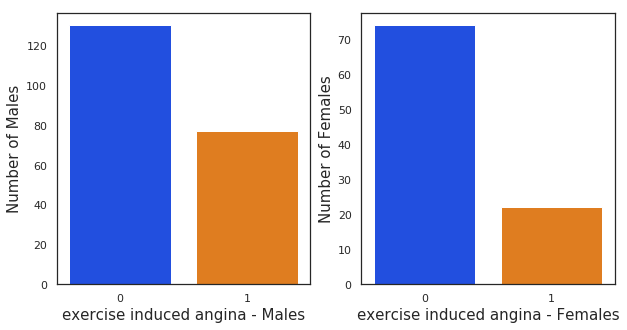

In [40]:
plt.figure(figsize=(10, 5))

#exercise induced angina - Males
#1 = yes, 0 = no
plt.subplot(1,2,1)
sns.countplot(data[data['sex']==1]['exang'])
plt.xlabel('exercise induced angina - Males', fontsize = 15)
plt.ylabel('Number of Males', fontsize = 15)

#exercise induced angina - Females
#1 = yes, 0 = no
plt.subplot(1,2,2)
sns.countplot(data[data['sex']==0]['exang'])
plt.xlabel('exercise induced angina - Females', fontsize = 15)
plt.ylabel('Number of Females', fontsize = 15)

We Concentrate on People with exercise induced angina (1 = Yes).
For more Detais about exercise induced angina [Click here](https://rehabilitateyourheart.wordpress.com/2013/01/16/exercise-induced-angina/)

In [41]:
exang1 = data[data['exang']==1][['sex', 'exang', 'restecg', 'age', 'thalach']]
exang1.head()

,sex,exang,restecg,age,thalach
4,0,1,1,57,163
13,1,1,0,64,144
21,1,1,1,44,179
23,1,1,1,61,137
24,1,1,1,40,178


Text(0.5, 1.0, 'Age Vs Thalach when Exang = 1')

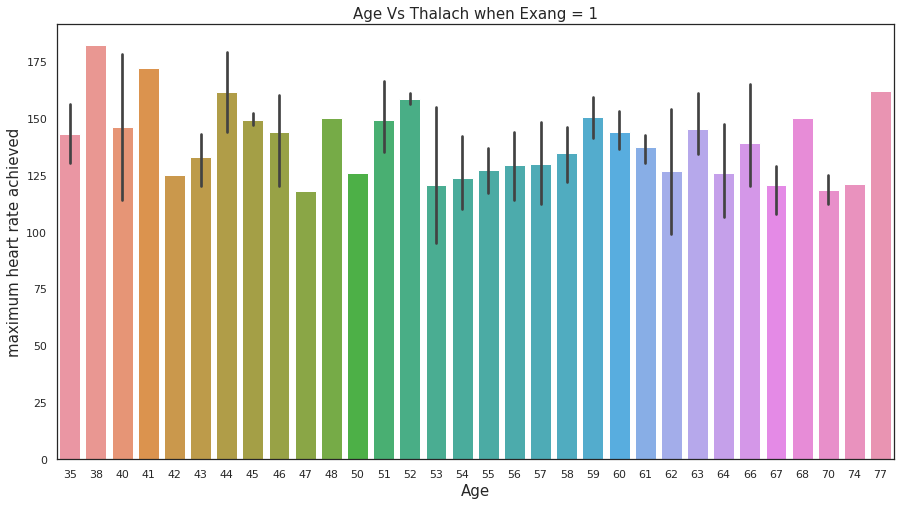

In [42]:
plt.figure(figsize = (15,8))
sns.barplot(x = 'age', y = 'thalach', data = exang1)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('maximum heart rate achieved', fontsize = 15)
plt.title('Age Vs Thalach when Exang = 1', fontsize = 15)

Analysis on **oldpeak** - ST depression induced by exercise relative to rest

In [43]:
data['oldpeak'].value_counts().head()

0.0    99
1.2    17
0.6    14
1.0    14
0.8    13
Name: oldpeak, dtype: int64

We Concentrate on the People whose oldpeak(ST depression induced by exercise relative to rest) 
is no equal to 0.

Text(0.5, 1.0, 'oldpeak frequency')

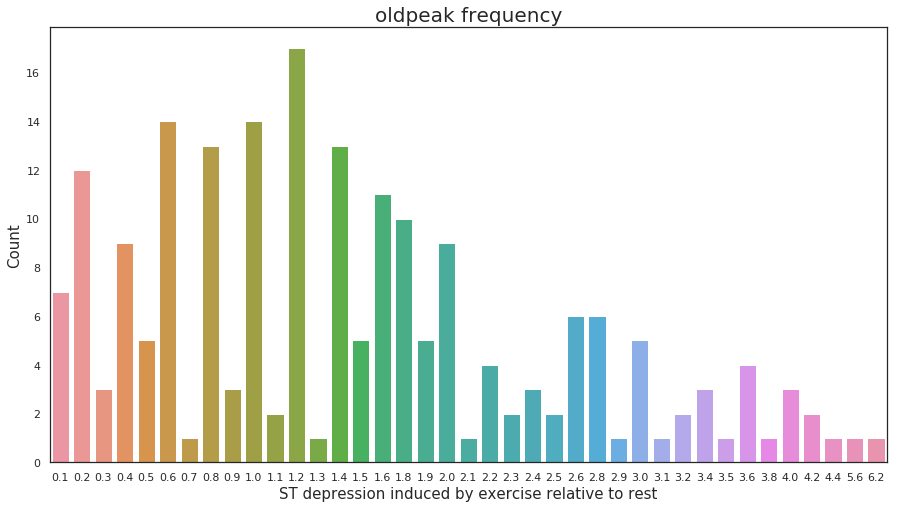

In [44]:
plt.figure(figsize = (15,8))
sns.countplot(data[data['oldpeak']!=0]['oldpeak'])
plt.xlabel('ST depression induced by exercise relative to rest', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('oldpeak frequency', fontsize = 20)

Some Violinplots ahead

Text(0.5, 1.0, 'violin plot of oldpeak')

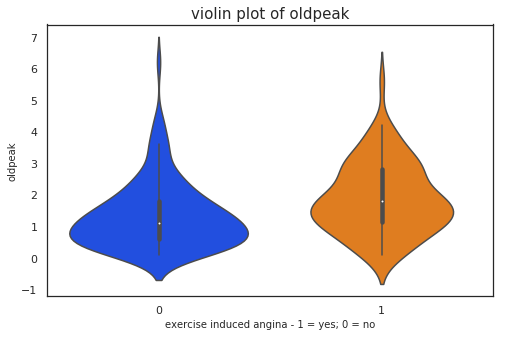

In [45]:
plt.figure(figsize = (8,5))
sns.violinplot(x = data['exang'], y = data[data['oldpeak']!=0]['oldpeak'])
plt.xlabel('exercise induced angina - 1 = yes; 0 = no', fontsize = 10)
plt.ylabel('oldpeak', fontsize = 10)
plt.title('violin plot of oldpeak', fontsize = 15)

Text(0.5, 1.0, 'violin plot of oldpeak')

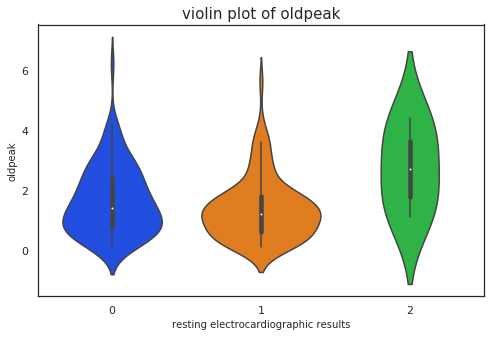

In [46]:
plt.figure(figsize = (8,5))
sns.violinplot(x = data['restecg'], y = data[data['oldpeak']!=0]['oldpeak'])
plt.xlabel('resting electrocardiographic results', fontsize = 10)
plt.ylabel('oldpeak', fontsize = 10)
plt.title('violin plot of oldpeak', fontsize = 15)

Text(0.5, 1.0, 'violin plot of oldpeak')

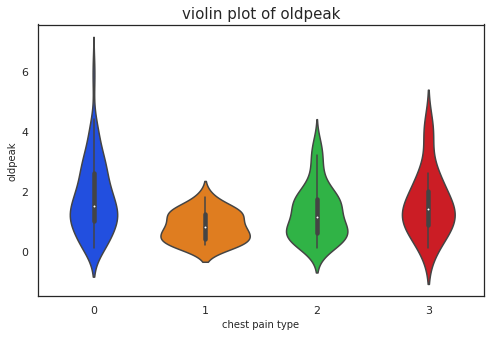

In [47]:
plt.figure(figsize = (8,5))
sns.violinplot(x = data['cp'], y = data[data['oldpeak']!=0]['oldpeak'])
plt.xlabel('chest pain type', fontsize = 10)
plt.ylabel('oldpeak', fontsize = 10)
plt.title('violin plot of oldpeak', fontsize = 15)

Text(0.5, 1.0, 'violin plot of oldpeak')

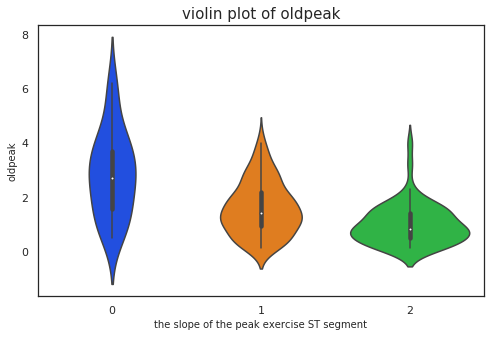

In [48]:
plt.figure(figsize = (8,5))
sns.violinplot(x = data['slope'], y = data[data['oldpeak']!=0]['oldpeak'])
plt.xlabel('the slope of the peak exercise ST segment', fontsize = 10)
plt.ylabel('oldpeak', fontsize = 10)
plt.title('violin plot of oldpeak', fontsize = 15)

Analysis on **slope** - the slope of the peak exercise ST segment

Text(0, 0.5, 'maximum heart rate achieved')

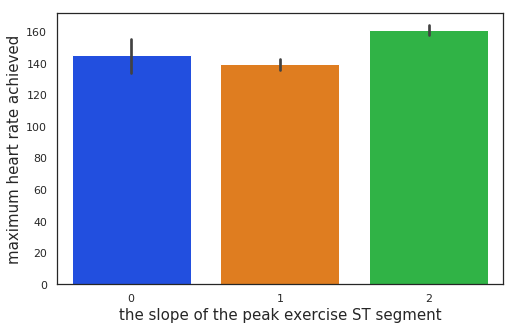

In [49]:
plt.figure(figsize = (8,5))
sns.barplot(x = 'slope', y = 'thalach', data = data)
plt.xlabel('the slope of the peak exercise ST segment', fontsize = 15)
plt.ylabel('maximum heart rate achieved', fontsize = 15)

Text(0.5, 1.0, 'Slope Vs Oldpeak')

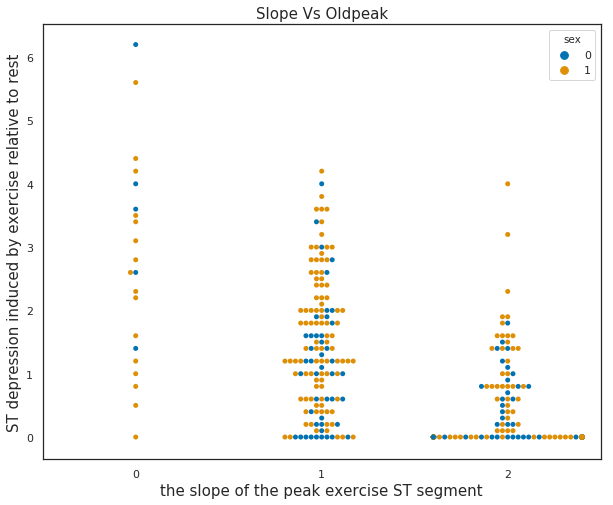

In [50]:
plt.figure(figsize = (10,8))
sns.set(style = 'white', palette = 'colorblind', color_codes = True)
sns.swarmplot(x = 'slope', y = 'oldpeak', hue = 'sex', data = data)
plt.xlabel('the slope of the peak exercise ST segment', fontsize = 15)
plt.ylabel('ST depression induced by exercise relative to rest', fontsize = 15)
plt.title('Slope Vs Oldpeak', fontsize = 15)

Analysis on **ca** - number of major vessels (0-3) colored by flourosopy

Text(0, 0.5, 'Frequency')

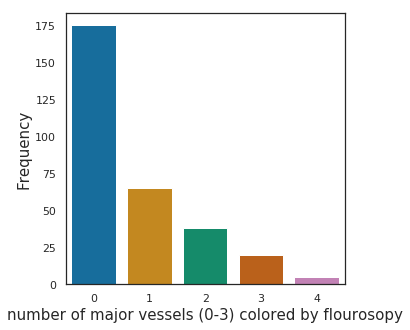

In [51]:
plt.figure(figsize = (5,5))
sns.countplot(data['ca'])
plt.xlabel('number of major vessels (0-3) colored by flourosopy', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

Analysis on Thal

Text(0, 0.5, 'Frequency')

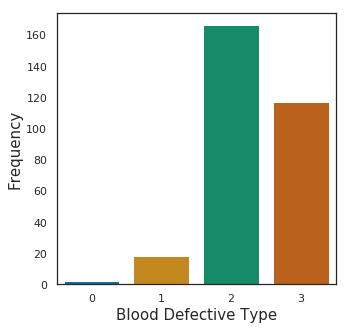

In [52]:
plt.figure(figsize = (5,5))
sns.countplot(data['thal'])
plt.xlabel('Blood Defective Type', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

Text(0.5, 1.0, 'Thal Vs Chol')

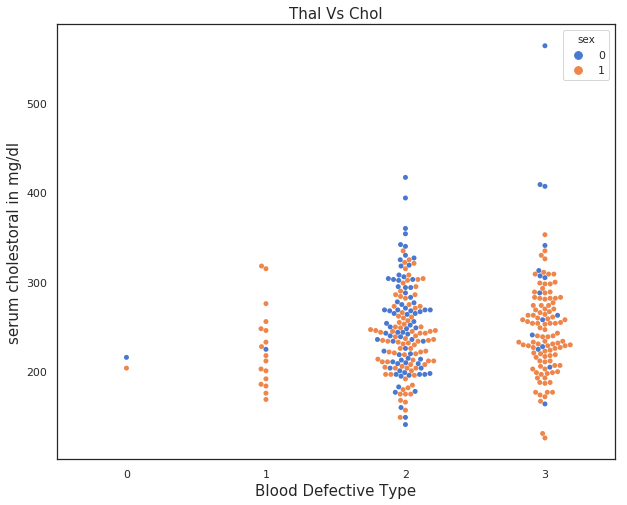

In [53]:
plt.figure(figsize = (10,8))
sns.set(style = 'white', palette = 'muted', color_codes = True)
sns.swarmplot(x = 'thal', y = 'chol', hue = 'sex', data = data)
plt.xlabel('Blood Defective Type', fontsize = 15)
plt.ylabel('serum cholestoral in mg/dl', fontsize = 15)
plt.title('Thal Vs Chol', fontsize = 15)

Text(0, 0.5, 'maximum heart rate achieved')

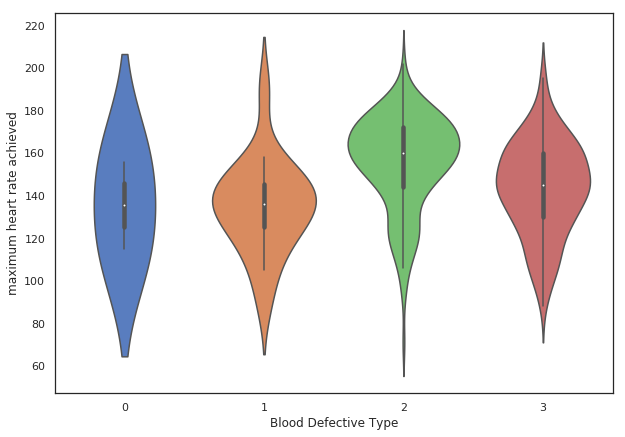

In [54]:
plt.figure(figsize = (10,7))
sns.violinplot(x = data['thal'], y = data['thalach'])
plt.xlabel('Blood Defective Type', fontsize = 12)
plt.ylabel('maximum heart rate achieved', fontsize = 12)

**Target** Analysis 

Text(0, 0.5, 'Frequency')

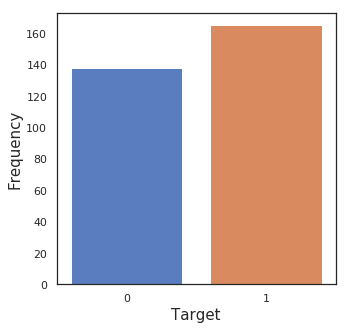

In [55]:
plt.figure(figsize = (5,5))
sns.countplot(data['target'])
plt.xlabel('Target', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

Text(0, 0.5, 'Number of Females')

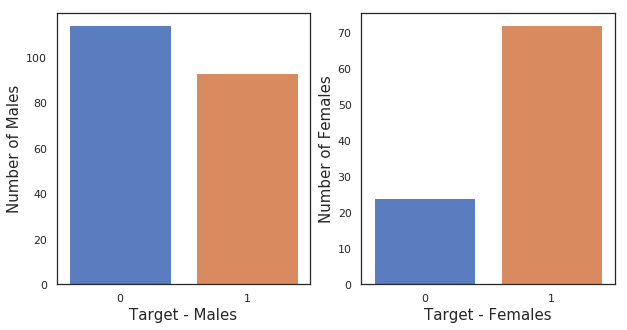

In [56]:
plt.figure(figsize=(10, 5))

#exercise induced angina - Males
#1 = yes, 0 = no
plt.subplot(1,2,1)
sns.countplot(data[data['sex']==1]['target'])
plt.xlabel('Target - Males', fontsize = 15)
plt.ylabel('Number of Males', fontsize = 15)

#exercise induced angina - Females
#1 = yes, 0 = no
plt.subplot(1,2,2)
sns.countplot(data[data['sex']==0]['target'])
plt.xlabel('Target - Females', fontsize = 15)
plt.ylabel('Number of Females', fontsize = 15)

Text(0.5, 1.0, 'Target Classification wrt resting BP')

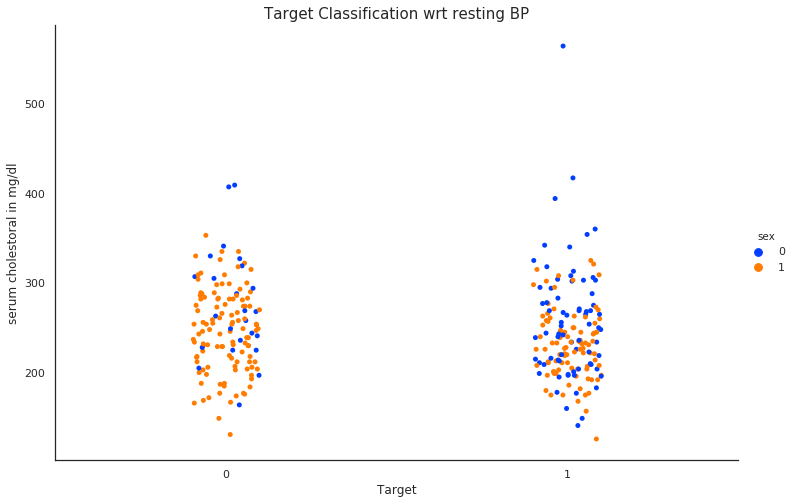

In [57]:
sns.set(style = 'white', palette = 'bright', color_codes = True)
sns.catplot(x = 'target', y = 'chol', hue = 'sex', height = 7, aspect = 1.5, data = data)
plt.xlabel('Target', fontsize = 12)
plt.ylabel('serum cholestoral in mg/dl', fontsize = 12)
plt.title('Target Classification wrt resting BP', fontsize = 15)

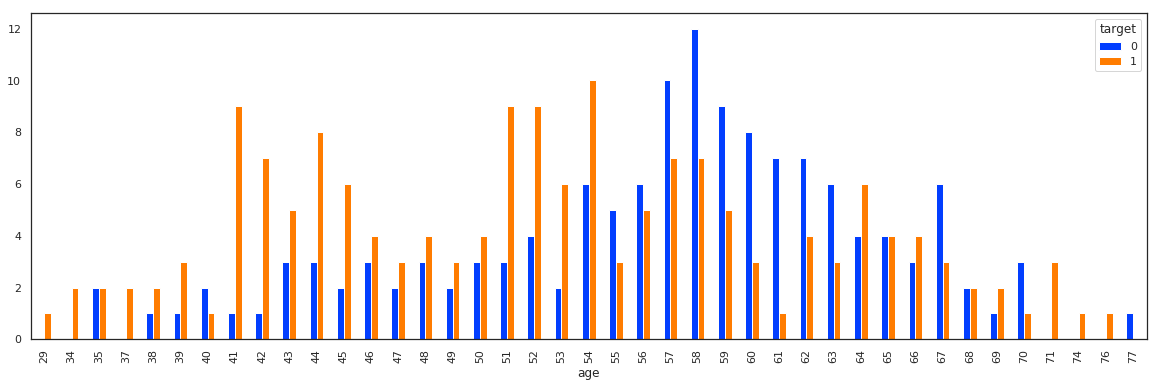

In [58]:
pd.crosstab(data.age,data.target).plot(kind='bar',figsize=(20,6))

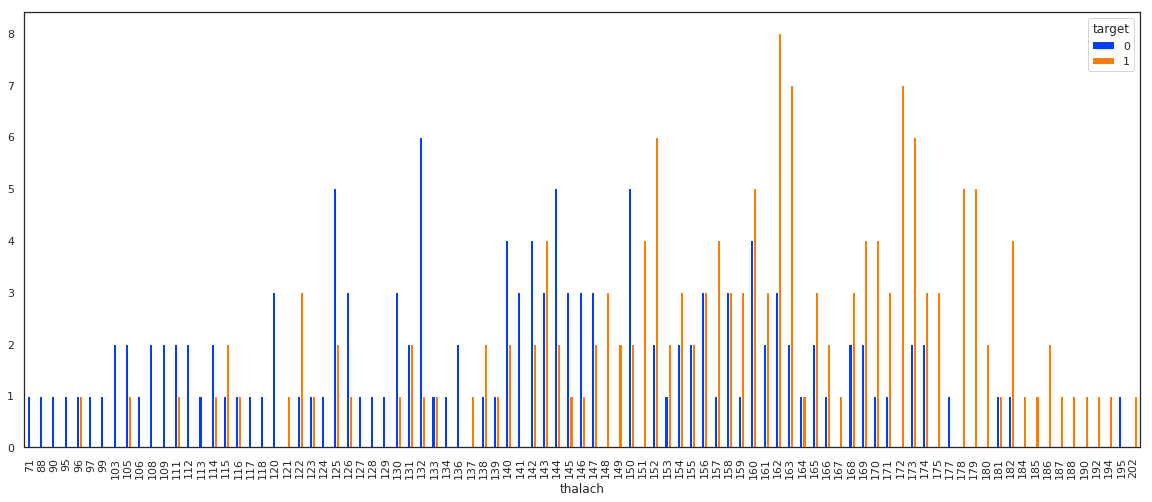

In [59]:
pd.crosstab(data.thalach,data.target).plot(kind='bar',figsize=(20,8))

Text(0.5, 1.0, 'Target Classification wrt Oldpeak')

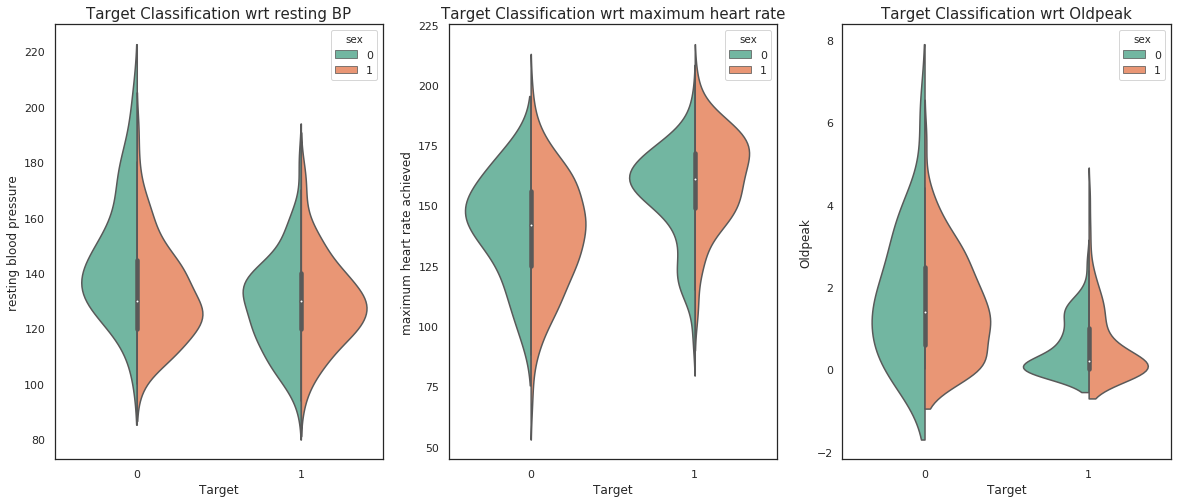

In [60]:
plt.figure(figsize = (20,8))

plt.subplot(1,3,1)
sns.violinplot(x = 'target', y = 'trestbps', split = True, hue = 'sex', data = data, palette="Set2")
plt.xlabel('Target', fontsize = 12)
plt.ylabel('resting blood pressure', fontsize = 12)
plt.title('Target Classification wrt resting BP', fontsize = 15)

plt.subplot(1,3,2)
sns.violinplot(x = 'target', y = 'thalach', split = True, hue = 'sex', data = data, palette="Set2")
plt.xlabel('Target', fontsize = 12)
plt.ylabel('maximum heart rate achieved', fontsize = 12)
plt.title('Target Classification wrt maximum heart rate', fontsize = 15)

plt.subplot(1,3,3)
sns.violinplot(x = 'target', y = 'oldpeak', split = True, hue = 'sex', data = data, palette="Set2" )
plt.xlabel('Target', fontsize = 12)
plt.ylabel('Oldpeak', fontsize = 12)
plt.title('Target Classification wrt Oldpeak', fontsize = 15)